<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_2020_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능

## TIL - 200209 텐서플로 따라하기(안경잡이 개발자)
- x축은 시간 
- y축은 임금
- 데이터를 기반으로 추후 임금 구하기

### 선형회귀를 이용한 임금 예상하기

In [0]:
import tensorflow as tf

In [0]:
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [0]:
w = tf.Variable(tf.random_uniform([1], -100, 100)) #기울기
b = tf.Variable(tf.random_uniform([1], -100, 100)) # 값

In [0]:
X = tf.placeholder(tf.float32)  # x축 설정하기
Y = tf.placeholder(tf.float32)  # y축 설정하기
H = w * X + b # 회귀선 

In [0]:
cost = tf.reduce_mean(tf.square(H-Y)) # 절대값을 구하여 평균값을 구함
a = tf.Variable(0.01)   # 점프값을 0.01로 정함.
optimizer = tf.train.GradientDescentOptimizer(a)    # 경사하강법을 라이브러리 이용하여 훈련하기
train = optimizer.minimize(cost)    # 무슨뜻?
init = tf.global_variables_initializer()    # 초기화?
sess = tf.Session()     # 세선을 선언
sess.run(init)

In [49]:
for i in range(5001):
    sess.run(train, feed_dict={X : xData, Y : yData})
    if i % 500 == 0:    # 500 번 마다 1번씩
        print(i, sess.run(cost, feed_dict={X : xData, Y : yData}), sess.run(w), sess.run(b))
print(sess.run(H, feed_dict={X : [2]})) # 8시간 일할 때 값을 구하기

0 8632657.0 [25642.848] [1428.6133]
500 8632657.0 [25642.848] [1428.6133]
1000 8632657.0 [25642.848] [1428.6133]
1500 8632657.0 [25642.848] [1428.6133]
2000 8632657.0 [25642.848] [1428.6133]
2500 8632657.0 [25642.848] [1428.6133]
3000 8632657.0 [25642.848] [1428.6133]
3500 8632657.0 [25642.848] [1428.6133]
4000 8632657.0 [25642.848] [1428.6133]
4500 8632657.0 [25642.848] [1428.6133]
5000 8632657.0 [25642.848] [1428.6133]
[52714.31]


### 텐서플로 - 상수

In [0]:
import tensorflow as tf


In [52]:
a = tf.constant(1)  # 상수 선언
b = tf.constant(2)
c = tf.add(a, b)    # 연산식
sess = tf.Session() # 세션만들기
sess.run(c)     # 연산을 수행

3

### 텐서플로 - 변수
- 변수를 바꿔줘야 할경우
- 계산할 때 마다 초기화를 다시 해줘야 함. 

In [0]:
import tensorflow as tf

In [56]:
a = tf.Variable(5)
b = tf.Variable(6)
c = tf.multiply(a, b)   # a, b의 곱하기 식
init = tf.global_variables_initializer()    # ★변수를 선언시 사용할 수 있도록 초기화 하기
sess = tf.Session()
sess.run(init)
sess.run(c)

30

### 텐서플로 - 플레이스 홀더(Placeholder)
- 다른 텐서를 할당함.
- 학습데이터를 포함하는 변수

In [0]:
import tensorflow as tf


In [0]:
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)    # 학습데이터를 포함하는 변수를 선언
y = x + 5       # y 식을 선언

In [62]:
sess = tf.Session()
sess.run(y, feed_dict={x : input})  # 학습데이터를 이용하여 y 값을 구하기

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

#### 예제 - 평균값 구하기

In [0]:
import tensorflow as tf


In [0]:
math_score = [90, 87, 57, 98, 83]   # 수학점수
english_socre = [88, 89, 78, 99, 68]    # 영어점수

In [0]:
a = tf.placeholder(dtype=tf.float32)    # 수학점수 플레이스홀더
b = tf.placeholder(dtype=tf.float32)    # 영어점수 플레이스홀더
y = (a + b) / 2     # 평균 값 구하는 식

In [70]:
sess = tf.Session()     # 세선선언
sess.run(y, feed_dict={a : math_score, b : english_socre})  #세션값 구하기

array([89. , 88. , 67.5, 98.5, 75.5], dtype=float32)

### 텐서플로 주요함수 실습하기
- 함수를 모두 배울 필요는 없으며, 필요할 때 알아보기

In [0]:
import tensorflow as tf


In [0]:
a = tf.constant(15)
b = tf.constant(6)

In [81]:
sess = tf.Session()
# add
c = tf.add(a,b)
sess.run(c)

21

In [83]:
# 빼기
c = tf.subtract(a, b)
sess.run(c)

9

In [84]:
# 곱하기
c = tf.multiply(a, b)
sess.run(c)

90

In [85]:
# 나누기
c = tf.truediv(a,b)
sess.run(c)

2.5

### 빅데이터 k-means
- 비지도학습
- 사전준비
    - 학생들의 성적에 따라 반을 나눈다
    - 얼마나 많은 반?(초급, 중급, 고급)
    - 데이터 준비
    - 수행하기 위한 방법 선택
- 수행과정
    - 중심에 가까운 데이터를 클러스터에 포함
    - 중심을 클러스터의 중앙으로 이동
    - 위의 과정을 반복

- k-means ++ 
    - 클러스터의 중심점을 자동으로 설정

#### 예제 - 클러스터링

In [0]:
from sklearn.cluster import KMeans  # kmean 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 데이터프레임 만들기

In [0]:
df = pd.read_csv('/content/drive/My Drive/data/ML/kmean_example.csv', header=None)
df.columns = ['x', 'y']


##### 그래프 그리기

Text(0.29999999999999716, 0.5, 'Y')

<Figure size 1008x576 with 0 Axes>

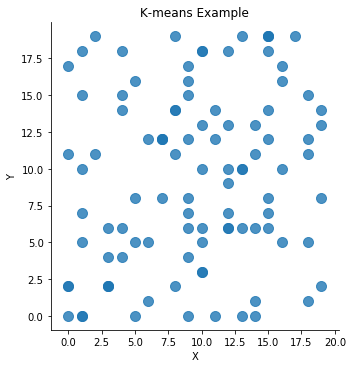

In [103]:
plt.figure(figsize=(14, 8))     # 그래프의 크기 설정하기. 현재 시본에서 작동 안함.
sns.lmplot('x', 'y', data=df,
           fit_reg=False,
           scatter_kws={"s" : 100} # 점의 크기를 100으로 설정하
           )
plt.title('K-means Example')
plt.xlabel('X')
plt.ylabel('Y')

##### 군집화 하기

In [0]:
points = df.values
kmeans = KMeans(n_clusters=4).fit(points)   # kmeans 중심점 4개를 설정하기
kmeans.cluster_centers_ #중심점 찾기
kmeans.labels_  # 클러스터링 라벨 표시하기
df['cluster'] = kmeans.labels_ # 클러스터한 것을 칼럼으로 넣기


##### 클러스터링 한것을 그래프로 표현하기

Text(27.176848958333338, 0.5, 'Y')

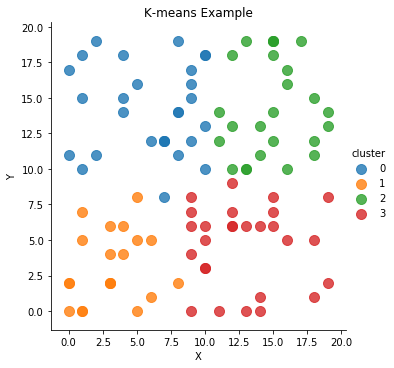

In [127]:
sns.lmplot('x', 'y', data=df,
           fit_reg=False,
           scatter_kws={"s" : 100}, # 점의 크기를 100으로 설정하
           hue = 'cluster')
plt.title('K-means Example')
plt.xlabel('X')
plt.ylabel('Y')

## TIL - 200210 : 배추가격 예측 AI로봇 
- 링크 : https://youtu.be/wZvhBVqitn8

### 데이터 수집
- 기상자료개방포털 
    - 기온 : https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70
    - 강수량 : https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69
- 농산물 유통정보 / 채소류 / 배추 / 전체품종
    - 소매가격 / 최소가격

### 데이터 정제
- 평균기온, 최저기온, 최고기온, 강수량, 가격

### 텐서플로 다변인 선형 모델 계발하기
- 변수가 여러가지 인경우 다변인 선형 회귀모델 적용
    - 식 : H(x1, x2, x3, x4) = x1w1 + x2w2 + x3w3 + x4w4 
        - 모든 변인이 가격에 영향을 미친다고 감안. 가중치를 고려하여 식을 세움.
        - 행렬의 곱을 이요한 식 : H(X) = XW
    - 학습률 : 0.000005

#### 라이브러리 호출

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

#### 데이터 불러오기

In [0]:
data = pd.read_csv('/content/drive/My Drive/data/ML/배추가격_데이터_예제_price data.csv')   # 데이터 파일 불러오기

#### 학습데이터 준비하기

In [0]:
model = tf.global_variables_initializer()   # 텐서플로 변수 초기화 하기
xy = np.array(data, dtype=np.float32)       # 데이터를 넘파이 값으로 담기 
x_data = xy[:, 1:-1]    # 모든행을 선택, 열은 2번째 부터 끝에서 2번째 열까지 선택(변수 4가지)
y_data = xy[:, [-1]]    # 모든행, 마지막 열 선택(가격)

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 4])     # x 축에 들어갈 학습데이터 선언
y = tf.placeholder(tf.float32, shape=[None, 1])     # y 축에 들어갈 학습데이터 선언
w = tf.Variable(tf.random_normal([4,1]), name = 'weight') # 가중치의 변수를 랜덤으로 선언 [4,1]의 의미는 변수의 모양 4개 1행
b = tf.Variable(tf.random_normal([1]), name='bias')       # 바이어스의 변수를 랜덤으로 선언 [1]의 의미는 변수의 형태임 1개 1행

#### 가설식 세우기

In [0]:
hypothesis = tf.matmul(x,w) + b     # 가설식 세우기. 행열의 곱을 이용하여 식 세우기

#### 계산식 세우기

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y))    # 계산식 세우기

#### 최적화 함수 선언

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005) # 최적화 함수 선언 및 학습율 설정하기
train = optimizer.minimize(cost)

#### 세선 만들기

In [0]:
sess = tf.Session() # 세션 만들기
sess.run(tf.global_variables_initializer())   # 변수값 초기화

#### 학습시키기

In [0]:
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={x : x_data, y : y_data})
    if step % 500 == 0:
        print('#', step, "손실비용 : ", cost_)
        print("- 배추가격 : ", hypo_[0])


#### 학습모델 저장하기 

In [15]:
saver = tf.train.Saver()
save_path = saver.save(sess, '/content/drive/My Drive/data/ML/배추가격예상하기/saved.cpkt')
print("학습된 모델을 저장햇습니다.")

학습된 모델을 저장햇습니다.


### 배추가격 예측하기 테스트 코드 작성하기
- 학습모델 저장하는 이유 : 한번 계산후 배추가격을 예상하면 시간이 절약됨.
- 저장된 학습모델을 이용하여 변수를 입력하여 실시간으로 배추가격을 계산하기

In [0]:
import tensorflow as tf
import numpy as np


In [0]:
x = tf.placeholder(tf.float32, shape = [None, 4])
y = tf.placeholder(tf.float32, shape=[None, 1])
w = tf.Variable(tf.random_normal([4,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#### 계산식 세우기

In [0]:
hyo

## TIL - 200216 : 배추가격 예상 AI 웹페이지로 구현하기 도전 후기

- 안경잡이개발자 동영상을 따라 구현하려고 함.
- 문제점 발생
    - 텐서프롤가 2.0으로 업그레이드가 되면서 placeholder매서드가 작동하지 않음.
    - 텐서프로 1.X 버전을 2.0d으로 올려주는 라이브러리를 호출하여 적용하였으나 실패함.
- 향후 방향
    - 텐서프로 2.0을 학습하여 적용할 필요가 있음.

## TIL - 200217 : 다이얼로그 플로우 알아보기
- 링크 : https://dialogflow.com
- 강의링크 : https://www.youtube.com/playlist?list=PLRx0vPvlEmdCb33sBZGXzVOMY_seqnWJT

### 강의 주제
- 1. 다이얼로그 플로우의 개요
    - AI를 이용하여 대화를 주고 받을 수 있는 서비스를 생성할 수 있음.
- 2. Intent를 생성해 단순 질의
    - 예상가능한 질문을 입력하면, 구문을 분석하여 알맞은 대답을 함.
- 3. Follow-up Intent를 이용하기
- 4. Entity로 단어 분리 인식하기
- 5. 엑셀파일 등을 이용하여 데이터를 만들고 json파일을 생성하여 업로드
- 6. 플라스크 연동하기
- 7. 카카오 챗봇 개발하기

# HTML / JS / Etc

## TIL - javascript 200216

- 자바스크립트는 자바와는 완전히 다른 언어.
    - 햄과 햄스터 처럼 햄글자만 겹치는 것과 비슷함.
- 하나의 완전한 코딩언어이므로 학습할 양이 많음.
    - 필요한 부분을 프로젝트에 적용하면서 배우는 것이 효과적
- 참고 사이트
    - jquery : https://jquery.com
        - 자바스크립트 코드 라이브러리 사이트
        - 내가 생각하는 기능들은 이미 함수형태로 구현되어 있음. 
        - 사용방법
            - jquery파일을 다운받아서 사용가능
            - 웹페이지 내에 링크형태로 삽입하여 사용가능 (CDN)
    - jqueryui : https://jqueryui.com
        - 자바스크립트 사용자 환경을 구현한 것을 모아 놓음. 